In [6]:
import os
from tqdm import tqdm
from textalyser import Textalyser

In [7]:
attrs = ['alt_readability',
 'avg_sentence_length',
 'avg_syllables',
 'char_count',
 'char_count_no_spaces',
 'distinct_word_count',
 'gunning_fog',
 'lexical_density',
 'longest_sentence',
 'max_sentence_length',
 'min_sentence_length',
 'sentence_count',
 'word_count']

In [9]:
articles = {}

for article in tqdm(os.listdir('micusp_body')):
    if '.txt' not in article:
        continue
    
    with open(os.path.join('micusp_body', article)) as f:
        t = Textalyser(f.read())
    articles[article] = {attr: getattr(t, attr) for attr in attrs}

100%|██████████| 828/828 [15:21<00:00,  1.34s/it]


In [10]:
import pickle
with open('micusp_all.pickle', 'wb') as f:
    pickle.dump(articles, f)

In [12]:
import matplotlib.pyplot as plt

(array([185., 287., 164.,  97.,  38.,  28.,  10.,   9.,   5.,   5.]),
 array([ 141.,  734., 1327., 1920., 2513., 3106., 3699., 4292., 4885.,
        5478., 6071.]),
 <a list of 10 Patch objects>)

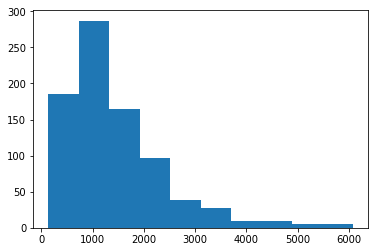

In [27]:
plt.hist([articles[i]['word_count'] for i in articles])

(array([  9.,  22.,  64., 137., 164., 165., 143.,  72.,  33.,  19.]),
 array([-2.1 ,  3.99, 10.08, 16.17, 22.26, 28.35, 34.44, 40.53, 46.62,
        52.71, 58.8 ]),
 <a list of 10 Patch objects>)

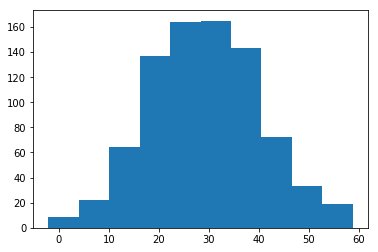

In [16]:
plt.hist([articles[i]['alt_readability'] for i in articles])

In [18]:
import numpy as np

In [22]:
np.argmin([articles[i]['alt_readability'] for i in articles])

315

In [23]:
[i for i in articles][315]

'BIO.G0.32.1.txt'

In [26]:
articles['BIO.G0.32.1.txt']

{'alt_readability': -2.1,
 'avg_sentence_length': 21.21,
 'avg_syllables': 2.21,
 'char_count': 8278,
 'char_count_no_spaces': 5667,
 'distinct_word_count': 503,
 'gunning_fog': 14.4,
 'lexical_density': 0.624,
 'longest_sentence': ' the second observation that supports the dependence hypothesis is that among the ten largest reefs in the mesoamerican coral reef system extending from mexico to belize mumby s team observed that the reefs that were the largest and had the highest levels of biodiversity and productivity were those with the strongest links to coastal mangrove forests',
 'max_sentence_length': 56,
 'min_sentence_length': 1,
 'sentence_count': 62,
 'word_count': 806}

In [28]:
import pandas as pd

In [35]:
p = pd.DataFrame([{i: articles[j][i] for i in articles[j] if i != 'longest_sentence'} for j in articles])

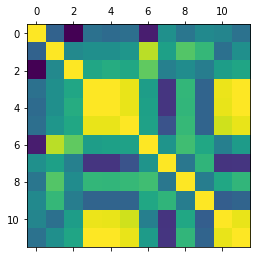

In [39]:
plt.matshow(p.corr())

In [40]:
p.corr()

,alt_readability,avg_sentence_length,avg_syllables,char_count,char_count_no_spaces,distinct_word_count,gunning_fog,lexical_density,max_sentence_length,min_sentence_length,sentence_count,word_count
alt_readability,1.000000,-0.327083,-0.935214,-0.211086,-0.258015,-0.230910,-0.780048,0.032476,-0.178314,-0.015159,-0.057921,-0.203073
avg_sentence_length,-0.327083,1.000000,-0.028005,0.029480,0.026781,0.080953,0.799570,0.161665,0.479243,0.354147,-0.220247,0.025128
avg_syllables,-0.935214,-0.028005,1.000000,0.212642,0.263265,0.214306,0.526021,-0.095347,0.009393,-0.116337,0.144387,0.205774
char_count,-0.211086,0.029480,0.212642,1.000000,0.997373,0.933357,0.142320,-0.637275,0.347064,-0.313959,0.940681,0.998031
char_count_no_spaces,-0.258015,0.026781,0.263265,0.997373,1.000000,0.934634,0.166407,-0.633143,0.340493,-0.314112,0.932880,0.996152
distinct_word_count,-0.230910,0.080953,0.214306,0.933357,0.934634,1.000000,0.173888,-0.441133,0.357753,-0.309434,0.857649,0.937470
gunning_fog,-0.780048,0.799570,0.526021,0.142320,0.166407,0.173888,1.000000,0.068018,0.404891,0.214742,-0.097597,0.130574
lexical_density,0.032476,0.161665,-0.095347,-0.637275,-0.633143,-0.441133,0.068018,1.000000,-0.171617,0.330087,-0.645456,-0.639974
max_sentence_length,-0.178314,0.479243,0.009393,0.347064,0.340493,0.357753,0.404891,-0.171617,1.000000,-0.115061,0.217539,0.339832
min_sentence_length,-0.015159,0.354147,-0.116337,-0.313959,-0.314112,-0.309434,0.214742,0.330087,-0.115061,1.000000,-0.358218,-0.315059
